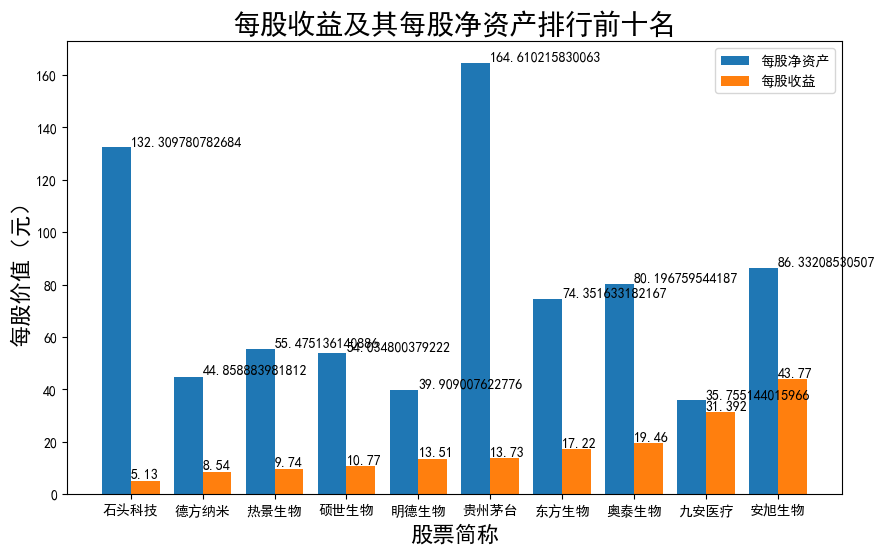

In [16]:
# 导入库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import akshare as ak

# 获取数据
ts_data=ak.stock_yjbb_em('20220331')

# 将数据转换为DataFrame数据
df1=pd.DataFrame(ts_data)

df1.duplicated().sum()
df1.isna().sum()

# 重复数据处理
df1=df1.drop_duplicates()

# 空值处理
df1=df1.dropna(axis=1, how='all')
df1=df1.dropna(axis=0, subset=['每股收益'])

# 对数据进行排序，并选择最好的十只股票
df1=df1.sort_values('每股收益')
df1=df1[-10:]

#设置X轴,Y轴数据
y=df1['每股净资产']
y1=df1['每股收益']
xx=df1['股票简称']

#解决汉字显示乱码
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
# 对柱状图进行设置
x = np.arange(len(xx))
# 柱状图总宽度，有几组数据
total_width, n = 0.8, 2 
# 单个柱状图的宽度  
width = total_width / n 
# 第一组数据柱状图横坐标起始位置  
x1 = x - width / 2   
x2 = x1 + width  

#设置画布大小
plt.figure(figsize=(10,6),dpi=100)

# 添加标签 
plt.xlabel('股票简称',fontsize='16') 
plt.ylabel('每股价值（元）',fontsize='16')  
plt.title('每股收益及其每股净资产排行前十名',fontsize='20')  
plt.bar(x1,y,width=width,label='每股净资产')
plt.bar(x2, y1, width=width,label='每股收益')    
plt.xticks(x, xx)
plt.legend()

# 对每个数据点加标注
for x_, y_ in zip(x, y):
    plt.text(x_, y_, y_, ha='left', va='bottom')
for x_, y_ in zip(x, y1):
    plt.text(x_, y_, y_, ha='left', va='bottom')
